<a href="https://colab.research.google.com/github/ArslanUllahKhan1/Rossmann-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
store = pd.read_csv("/content/drive/MyDrive/Dataset/Copy of store.csv")
rossman = pd.read_csv("/content/drive/MyDrive/Dataset/Copy of Rossmann Stores Data.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
store.shape

(1115, 10)

In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
rossman.shape

(1017209, 9)

In [9]:
rossman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
rossman.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
combined_data = pd.merge(store,rossman,on='Store')
combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [12]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

In [13]:
combined_data.shape

(1017209, 18)

In [14]:
combined_data.isnull().sum() #Checking for null values

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

In [15]:
# extracting year and month from Date 
combined_data['Year'] = combined_data['Date'].apply(lambda x : int(str(x)[0:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x : int(str(x)[5:7]))

In [16]:
combined_data.shape

(1017209, 20)


##Now let's see the relation between different Variables

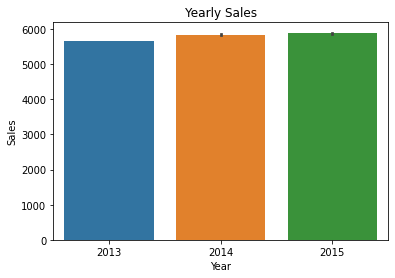

In [17]:
# Sales with respect to year 
sns.barplot(x='Year', y='Sales', data=combined_data).set(title='Yearly Sales')
plt.show()

Observation - Increasing in sales year to year

[Text(0.5, 1.0, 'Sales on Promo')]

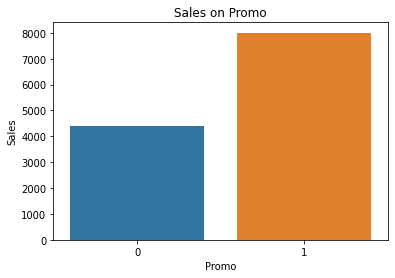

In [18]:
# Now let's see how promo is impacting sales
sns.barplot(x='Promo',y='Sales',data=combined_data).set(title='Sales on Promo')

Observation - More sale when promo are running

[Text(0.5, 1.0, 'Assortment vs Sales')]

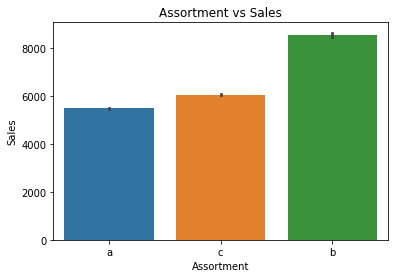

In [19]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')


Observation - Assortment level 'b' have the highest sales

[Text(0.5, 1.0, 'School Holiday vs Sales')]

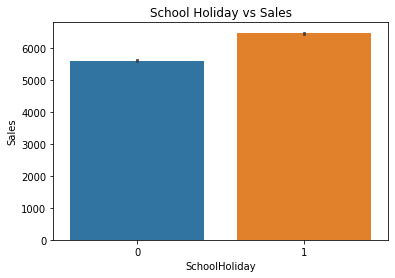

In [20]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')

Observation - More sales on School Holidays

[Text(0.5, 1.0, 'Sales vs Day of Week')]

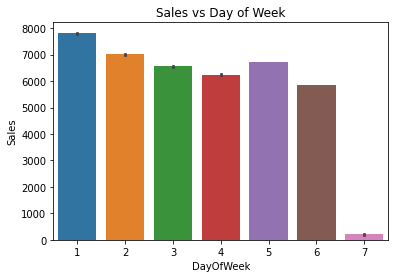

In [21]:
#Sales of different days of week
sns.barplot(x='DayOfWeek',y='Sales',data=combined_data).set(title='Sales vs Day of Week')

Observation - Monday, Tuesday and Friday have the highest sales and Sunday is the lowest sale.

[Text(0.5, 1.0, 'StoreType vs Sales')]

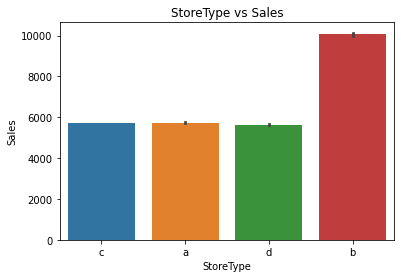

In [22]:
# Sales with respect to Storetype
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')

Observation - b type stores have the highest sales

##Missing Values Handling

In [23]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [24]:
rossman.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Observation - We can see that only store data have missing values so we fill them with appropriate value

In [25]:
# Filling CompetitionDistance with mean distance
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].mean())

In [26]:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0) # Filling values with 0
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])  # Filling values with mode
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])  # Filling values with

In [27]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with mode
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])

In [28]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###Outliers Detection and Removal

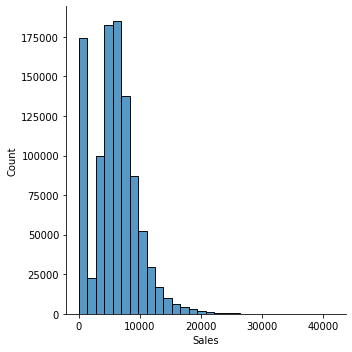

In [29]:
sns.displot(combined_data,x='Sales',bins=30)

Observation - From the above graph we can see that sales >25k are very less, so it might be an outlier

Now we will check the Z-Score and see if any datapoint have greater than 3 z-score then we treat them as Outlier

Total Outliers:  9731


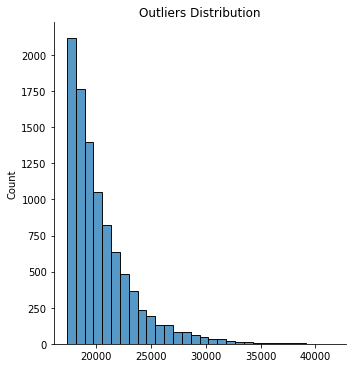

In [30]:
mean_sales = np.mean(combined_data['Sales'])
std_sales = np.std(combined_data['Sales'])

threshold = 3

outliers = []
for i in combined_data['Sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total Outliers: ', len(outliers))

sns.displot(x=outliers,bins=30).set(title='Outliers Distribution')

In [31]:
# Percentage of Outliers 
zero_sales = combined_data.loc[combined_data['Sales']==0]
sales_greater_than_25k = combined_data.loc[combined_data['Sales'] > 25000]
print('Total percentage of 0 in dataset: %.3f%%' %((len(zero_sales)/len(combined_data))*100))
print('Total percentage of sales >25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(combined_data))*100))

Total percentage of 0 in dataset: 16.995%
Total percentage of sales >25k in dataset: 0.075% 


Now as we can see we have very less percentage of sales datapoints that are >25k so we can drop them.

In [32]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 25000].index,inplace=True)

In [33]:
combined_data.shape

(1016451, 20)

###Converting Categorical Variable to Numeric

In [34]:
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[0:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)
combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,5263,555,1,1,0,1,2015,7
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,5020,546,1,1,0,1,2015,7
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,4782,523,1,1,0,1,2015,7
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,5011,560,1,1,0,1,2015,7
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,6102,612,1,1,0,1,2015,7


In [35]:
combined_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
Year                           int64
Month                          int64
dtype: object

In [36]:
combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0' # StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
combined_data['PromoInterval'].loc[combined_data['PromoInterval'] == 0] = '0' # PromoInterval column has values 0 & "0", So, we need to change values with 0 to "0"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [38]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

combined_data['StoreType'] = label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment'] = label_encoder.fit_transform(combined_data['Assortment'])
combined_data['StateHoliday'] = label_encoder.fit_transform(combined_data['StateHoliday'])
combined_data['PromoInterval'] = label_encoder.fit_transform(combined_data['PromoInterval'])

combined_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,5,5263,555,1,1,0,1,2015,7
1,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,4,5020,546,1,1,0,1,2015,7
2,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,3,4782,523,1,1,0,1,2015,7
3,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,2,5011,560,1,1,0,1,2015,7
4,1,2,0,1270.0,9.0,2008.0,0,NaN,NaN,3,1,6102,612,1,1,0,1,2015,7


In [39]:
combined_data.dtypes

Store                          int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
Year                           int64
Month                          int64
dtype: object

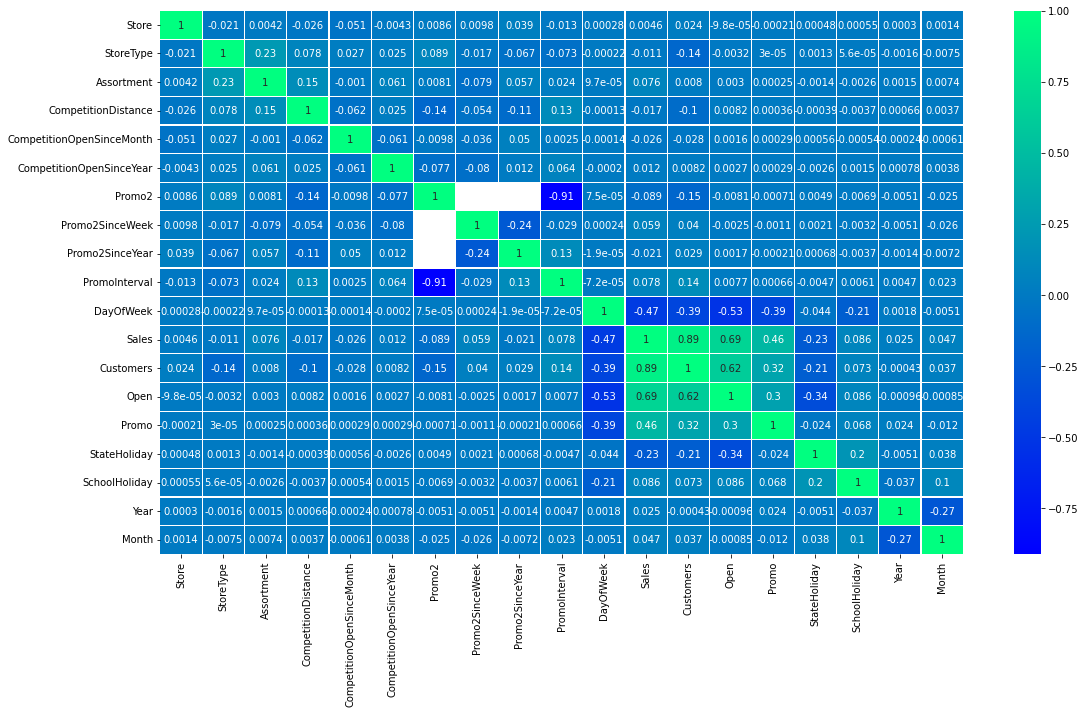

In [40]:
#Checking Correlation
correlation = combined_data.corr()
correlation
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='winter')

Observation-
Sales is highly correlated with Customers, Open and Promo code and minorly correlated to school holidays

##Model Building

Our ML model will predict sales only on when store are open because there's no 
sale when store is closed.

In [41]:
combined_data_open = combined_data[combined_data['Open']==1]
combined_data_closed = combined_data[combined_data['Open']==0]

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math

X_train, X_test, y_train, y_test_open = train_test_split(combined_data_open.drop(['Sales','Customers','Open'],axis=1),combined_data_open['Sales'], test_size=0.2, random_state=20)

In [43]:
X_train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month'],
      dtype='object')

In [44]:
X_train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Promo,StateHoliday,SchoolHoliday,Year,Month
90192,99,2,2,2030.0,11.0,2003.0,1,22.0,2012.0,2,6,0,0,0,2013,11
325349,358,0,0,2890.0,10.0,2003.0,0,NaN,NaN,3,1,1,0,0,2015,4
859601,944,2,0,1670.0,7.0,2015.0,0,NaN,NaN,3,4,1,0,0,2015,1
804622,883,0,0,3200.0,6.0,2005.0,0,NaN,NaN,3,4,0,0,0,2014,10
546971,600,3,2,17340.0,6.0,2010.0,1,9.0,2011.0,0,6,0,0,0,2014,7


In [45]:
y_test_closed = np.zeros(combined_data_closed.shape[0])
y_test = np.append(y_test_open, y_test_closed)

In [46]:
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())
y_test_open = y_test_open.fillna(y_test_open.mean())

###Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
prediction_open = model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [49]:
# Checking Performance of Model
print('The r2_score =',r2_score(y_test,y_predict)) #Checking r2 score
print('The Mean absolute error = %.2f' % mean_absolute_error(y_test,y_predict)) #checking Mean Absolute Error
print('The Root mean squared error = ', math.sqrt(mean_squared_error(y_test,y_predict))) #Checking Root Mean Square Error

The r2_score = 0.7784061010317642
The Mean absolute error = 992.30
The Root mean squared error =  1914.395102807405


Text(0, 0.5, 'Predicted values')

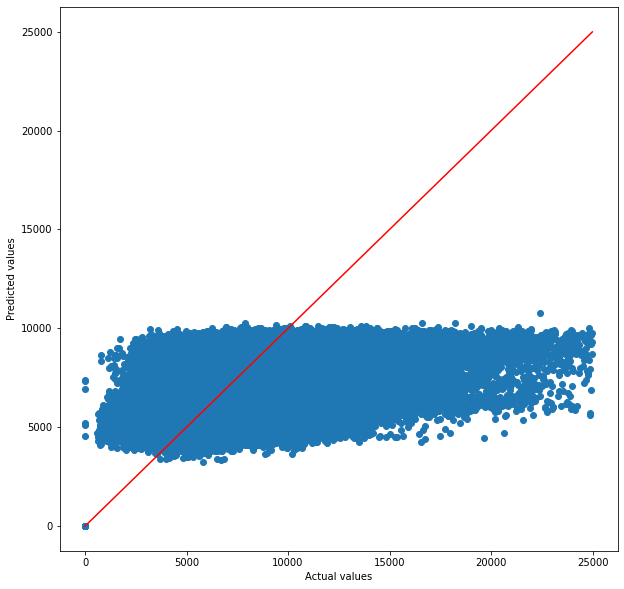

In [50]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Observation - From the above plot we can see that Linear regression model is performing badly as its not making any predictions more than 10000.

###Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [52]:
# Checking Performance of Model
print('The r2_score =',r2_score(y_test,y_predict))  #Checking r2 score
print('The Mean absolute error = %.2f' % mean_absolute_error(y_test,y_predict))  #checking Mean Absolute Error
print('The Root mean squared error = ', math.sqrt(mean_squared_error(y_test,y_predict))) #Checking Root Mean Square Error

The r2_score = 0.951750233218244
The Mean absolute error = 420.13
The Root mean squared error =  893.3060686872179


Observation - The decision tree regressor performing well as compared to linear regressors

###Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

prediction_open = random_forest_model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [54]:
# Performance of the model

print('The r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

The r2_score: 0.965586492941999
Mean absolute error: 355.80
Root mean squared error:  754.426859368173


Text(0, 0.5, 'Predicted values')

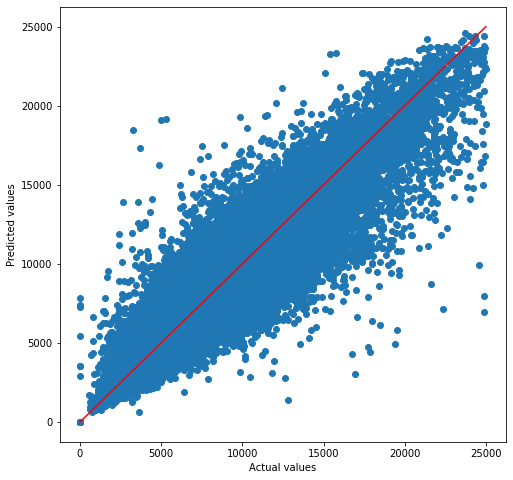

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Observation - Random Forest regressor have the highest r2 score and lowest error as compared to other models

####Important Features

In [56]:
feature_importance = random_forest_model.feature_importances_ #getting weights of all the features
feature_importance

array([0.16821655, 0.03494955, 0.02859641, 0.20131202, 0.07469719,
       0.08049763, 0.00950657, 0.02931316, 0.02830446, 0.02062161,
       0.08106286, 0.14264111, 0.00117303, 0.01280089, 0.02389806,
       0.06240891])

In [57]:
columns = list(X_train.columns)
columns

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month']

In [58]:
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df

,Features,Values
0,Store,0.168217
1,StoreType,0.034950
2,Assortment,0.028596
3,CompetitionDistance,0.201312
4,CompetitionOpenSinceMonth,0.074697
5,CompetitionOpenSinceYear,0.080498
6,Promo2,0.009507
7,Promo2SinceWeek,0.029313
8,Promo2SinceYear,0.028304
9,PromoInterval,0.020622


In [59]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
3,CompetitionDistance,0.201312
0,Store,0.168217
11,Promo,0.142641
10,DayOfWeek,0.081063
5,CompetitionOpenSinceYear,0.080498
4,CompetitionOpenSinceMonth,0.074697
15,Month,0.062409
1,StoreType,0.034950
7,Promo2SinceWeek,0.029313
2,Assortment,0.028596


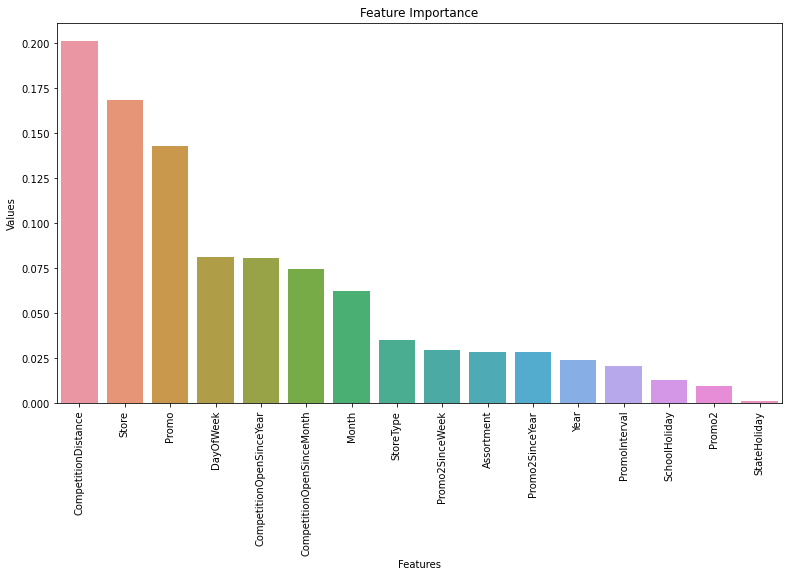

In [60]:
# Feature Importance
plt.figure(figsize=(13,7))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

Observation - Top 5 important features are:

1.   CompetitionDistance
2.   Store

1.    Promo
2.   DayOfWeek

1.   CompetitionOpenSinceYear










###Conclusion

As competition is very high, promo codes can help them to boost their sales. We have observed that sales also depend upon the store type. Store model B has the highest number of sales out of all store models like A, B, C, and D. Sales was also depending upon the days of the week, as Monday and Friday received the highest number of sales. Also, the assortment has a role in sales and assortment level b has the highest sales.
We have seen a huge difference in sales when the Promo code was available in the store.
Also, most of the stores are closed on Holidays, so state holidays do not affect sales
